In [1]:
from datetime import date
import os
import zipfile
from google.colab import drive #Mount Google Drive
import pandas as pd # many functions and methodsexpedite the data analysis process, data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # standard trigonometric functions, functions for arithmetic operations, handling complex numbers, etc
import seaborn as sns # used for data visualization and exploratory data analysis
import matplotlib.pyplot as plt # Matplotlib module which provides a MATLAB-like interface
from pandas import to_datetime #This function converts a scalar, array-like, Series or DataFrame /dict-like to a pandas datetime object.
from pandas import DataFrame #a 2 dimensional data structure, like a 2 dimensional array, or a table with rows and columns.
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score # the mean squared error (MSE) is an estimator measures the average of the squares of the errors, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.
from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range.
from sklearn.model_selection import train_test_split
from math import log

#Importing the Keras libraries and packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, Dense, Dropout, AveragePooling1D
from keras.optimizers import Nadam, Adam, RMSprop, SGD, Adamax
from keras.utils.vis_utils import plot_model

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/traffic.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/traffic')

In [4]:
dataset = pd.read_csv('/tmp/traffic/covid_impact_on_airport_traffic.csv')
dataset["Date"]=pd.to_datetime(dataset["Date"])
dataset.sort_values(by='Date', ascending=True, inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [5]:
#dataset = dataset.drop(columns = ['AggregationMethod','Version','Centroid', 'Geography'])

In [6]:
dataset.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-03-16,1.0,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
1,Daily,2020-03-16,1.0,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -..."
2,Daily,2020-03-16,1.0,Hartsfield-Jackson Atlanta International,92,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
3,Daily,2020-03-16,1.0,Los Angeles International,98,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
4,Daily,2020-03-16,1.0,McCarran International,68,POINT(-115.14888081287 36.082853976328),Paradise,Nevada,US-NV,United States of America (the),"POLYGON((-115.158487558365 36.1007120735771, -..."


In [7]:
dataset.tail()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
7242,Daily,2020-12-02,1.0,Los Angeles International,81,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
7243,Daily,2020-12-02,1.0,Boston Logan International,66,POINT(-71.0102909977065 42.3636330376787),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON((-71.0050892829895 42.3472534332511, -..."
7244,Daily,2020-12-02,1.0,Calgary International,99,POINT(-114.013122872131 51.1184753727795),Calgary,Alberta,CA-AB,Canada,"POLYGON((-113.981866836548 51.1392131913567, -..."
7245,Daily,2020-12-02,1.0,Winnipeg International,100,POINT(-97.2190621861971 49.9024712565967),Winnipeg,Manitoba,CA-MB,Canada,"POLYGON((-97.2094345092773 49.8979517850609, -..."
7246,Daily,2020-12-02,1.0,Montreal Mirabel,100,POINT(-74.048379779338 45.6815027038316),Mirabel,Quebec,CA-QC,Canada,"POLYGON((-74.0895652770996 45.6856314730097, -..."


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AggregationMethod  7247 non-null   object        
 1   Date               7247 non-null   datetime64[ns]
 2   Version            7247 non-null   float64       
 3   AirportName        7247 non-null   object        
 4   PercentOfBaseline  7247 non-null   int64         
 5   Centroid           7247 non-null   object        
 6   City               7247 non-null   object        
 7   State              7247 non-null   object        
 8   ISO_3166_2         7247 non-null   object        
 9   Country            7247 non-null   object        
 10  Geography          7247 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 622.9+ KB


In [9]:
dataset.shape

(7247, 11)

In [10]:
dataset.columns

Index(['AggregationMethod', 'Date', 'Version', 'AirportName',
       'PercentOfBaseline', 'Centroid', 'City', 'State', 'ISO_3166_2',
       'Country', 'Geography'],
      dtype='object')

In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [13]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Version,7247.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
PercentOfBaseline,7247.0,66.651442,22.134433,0.0,53.0,67.0,84.0,100.0


In [14]:
dataset["Country"].unique()

array(['Chile', 'Canada', 'United States of America (the)', 'Australia'],
      dtype=object)

In [15]:
dataset.groupby("Country")[['State','City','AirportName']].nunique()

,State,City,AirportName
Country,,,
Australia,1,1,1
Canada,6,9,9
Chile,1,1,1
United States of America (the),15,16,17


In [16]:
dataset["City"].unique()

array(['Santiago', 'Halifax', 'College Park', 'Los Angeles', 'Paradise',
       'Charlotte', 'Chicago', 'Leduc County', 'Floris', 'SeaTac',
       'Mirabel', 'Richmond', 'Urban Honolulu', 'New York',
       'Miami Springs', 'South San Francisco', 'Grapevine', 'Newark',
       'Sydney', 'Dorval', 'Romulus', 'Hamilton', 'Denver', 'Mississauga',
       'Winnipeg', 'Boston', 'Calgary'], dtype=object)

In [17]:
dataset.groupby("AirportName")["Country"].count()

AirportName
Boston Logan International                   261
Calgary International                        261
Charlotte Douglas International              261
Chicago OHare International                  261
Dallas/Fort Worth International              262
Daniel K. Inouye International               261
Denver International                         261
Detroit Metropolitan Wayne County            261
Edmonton International                       236
Halifax International                        252
Hamilton International                       260
Hartsfield-Jackson Atlanta International     262
John F. Kennedy International                262
Kingsford Smith                              257
LaGuardia                                    261
Los Angeles International                    262
McCarran International                       261
Miami International                          261
Montreal Mirabel                             257
Montreal Trudeau                             262
Newark L

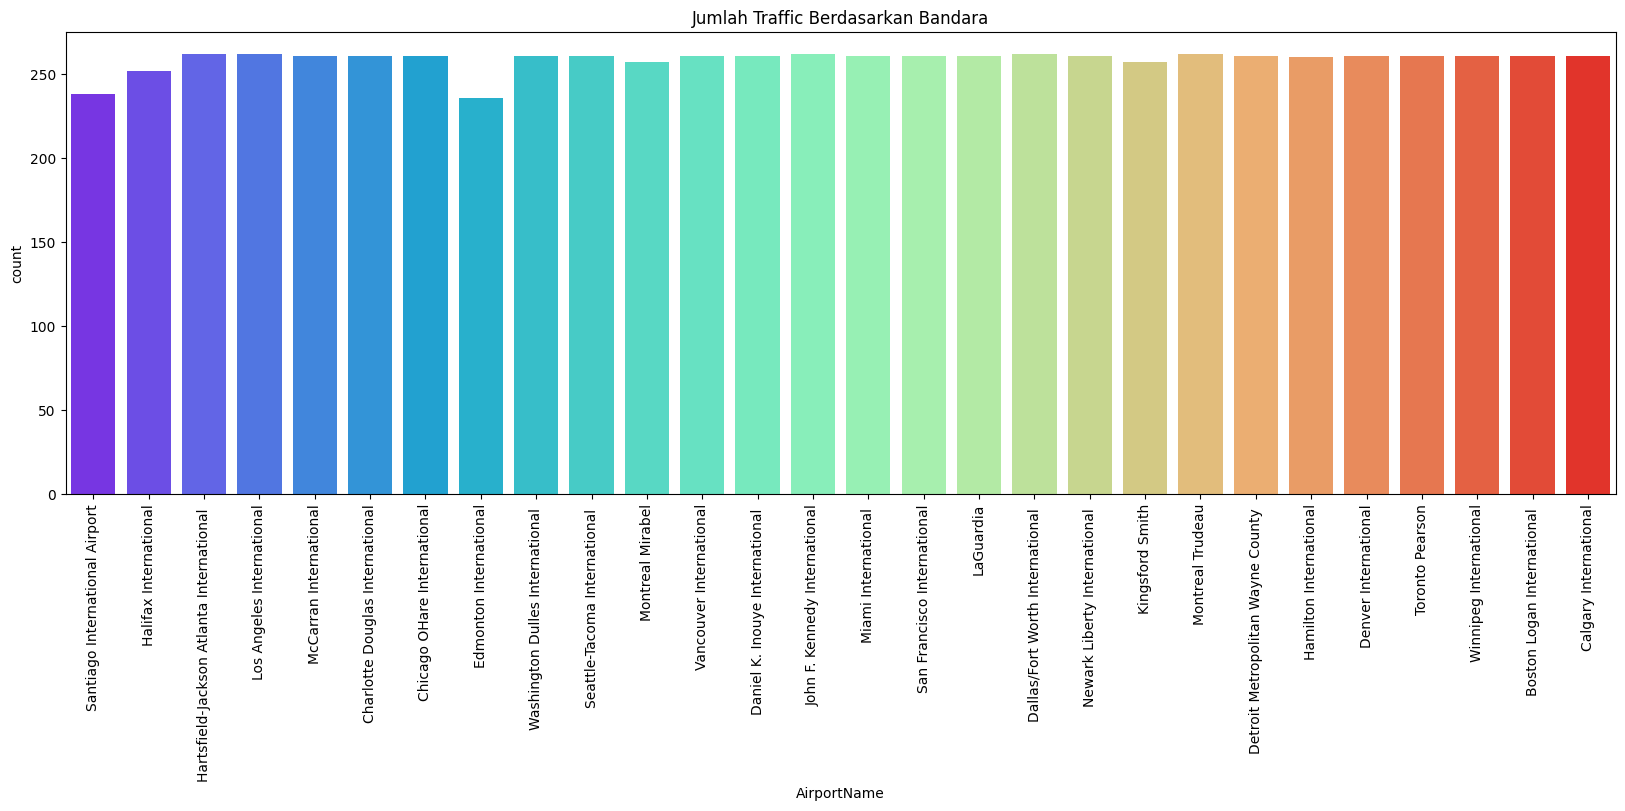

In [18]:
plt.figure(figsize=(20,6))
figure1 = sns.countplot(x = 'AirportName', data = dataset , palette='rainbow')
figure1.set_xticklabels(figure1.get_xticklabels(), rotation=90)
figure1.set_title("Jumlah Traffic Berdasarkan Bandara")
plt.show();

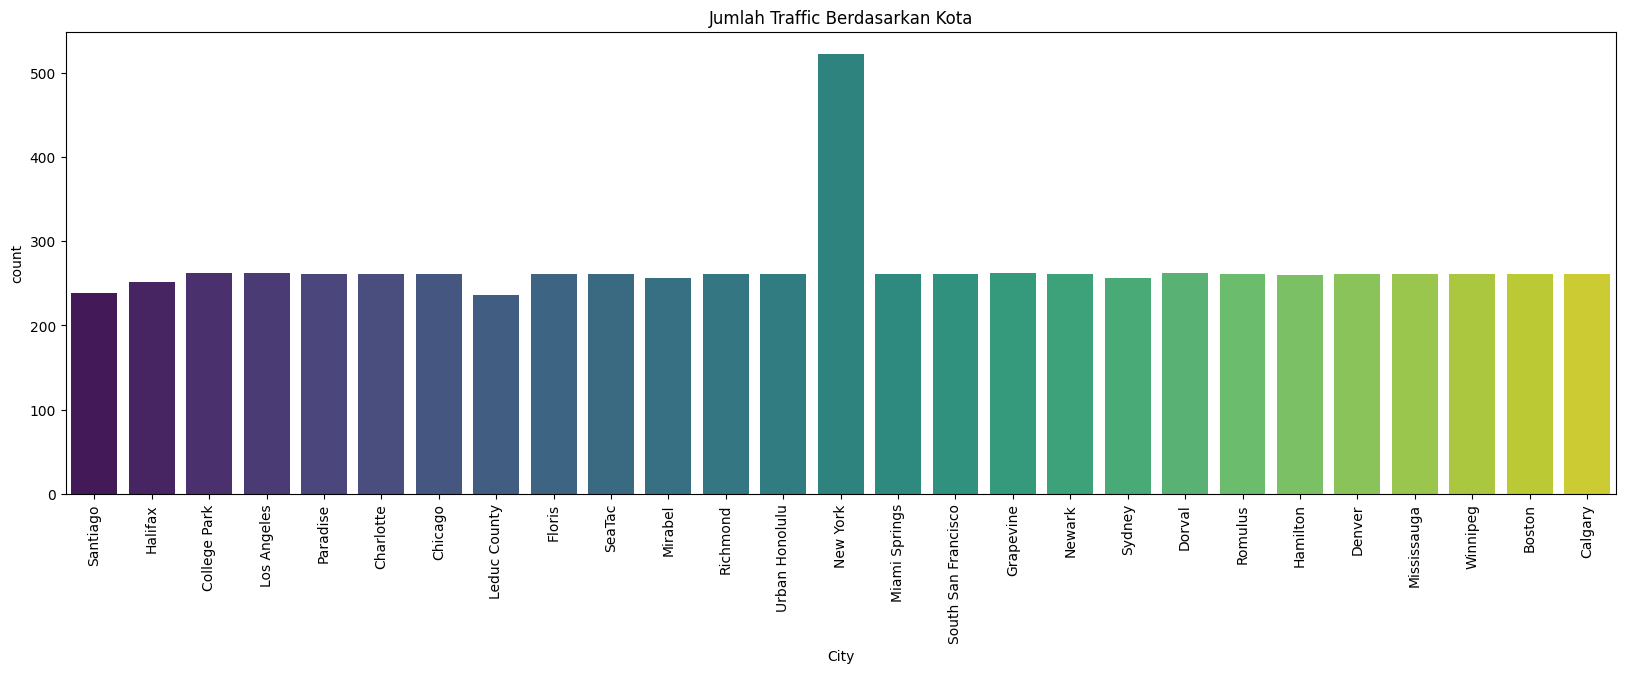

In [19]:
plt.figure(figsize=(20,6))
figure2 = sns.countplot(x = 'City', data = dataset , palette='viridis')
figure2.set_xticklabels(figure2.get_xticklabels(), rotation=90)
figure2.set_title("Jumlah Traffic Berdasarkan Kota")
plt.show();

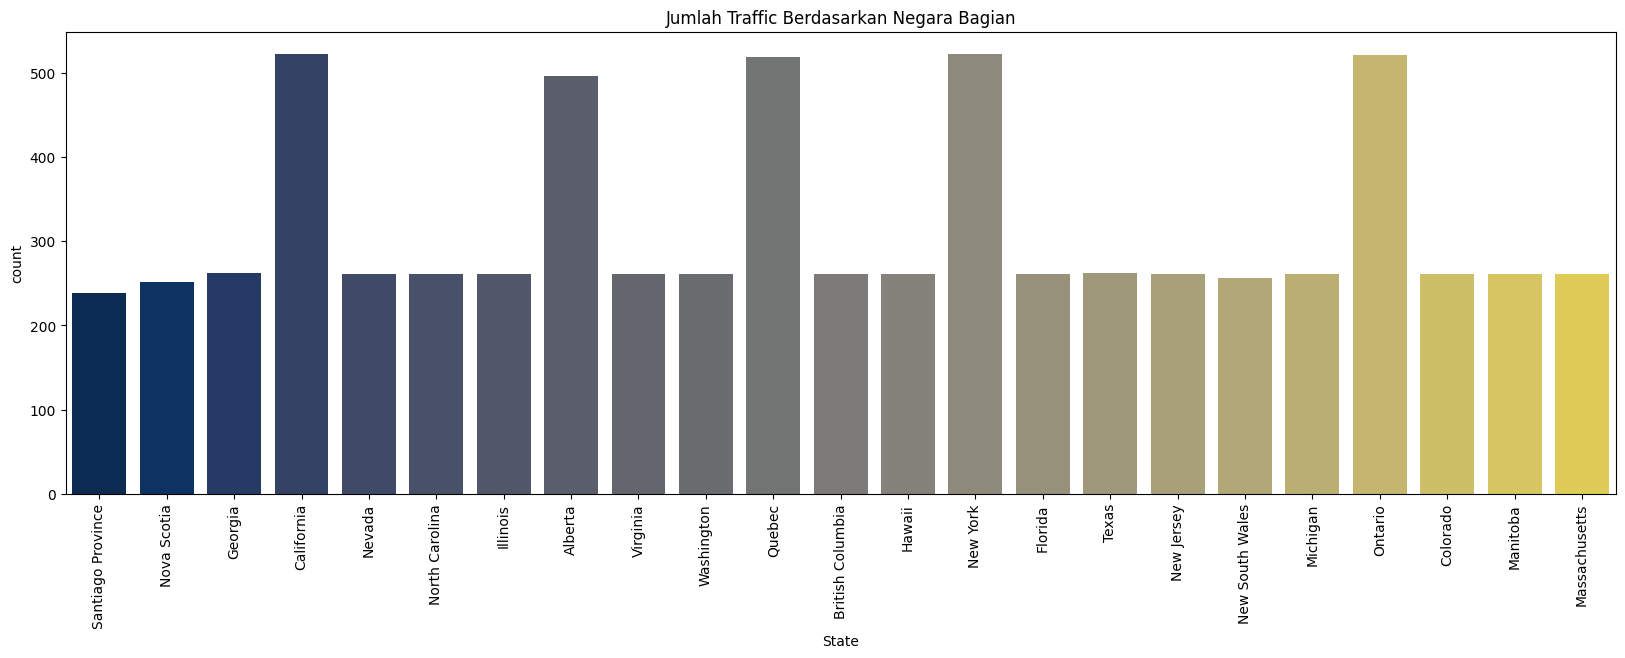

In [20]:
plt.figure(figsize=(20,6))
figure3 = sns.countplot(x = 'State', data = dataset , palette='cividis')
figure3.set_xticklabels(figure3.get_xticklabels(), rotation=90)
figure3.set_title("Jumlah Traffic Berdasarkan Negara Bagian")
plt.show();

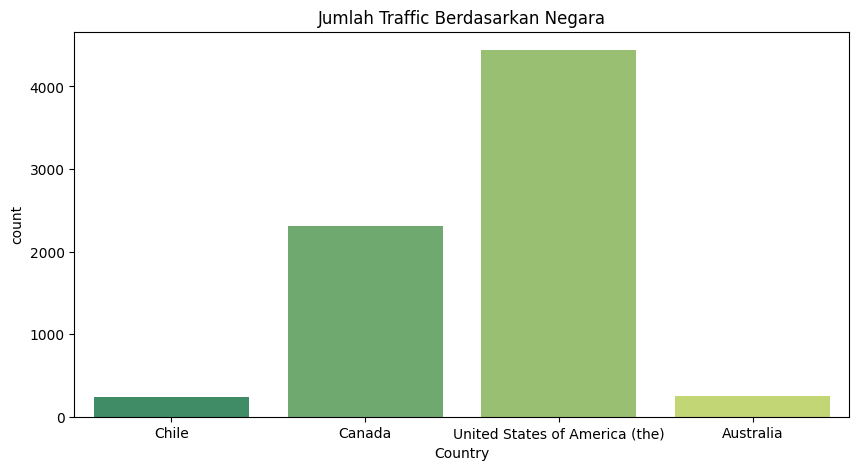

In [21]:
plt.figure(figsize=(10,5))
figure4 = sns.countplot(x = 'Country', data = dataset , palette='summer')
figure4.set_xticklabels(figure4.get_xticklabels())
figure4.set_title("Jumlah Traffic Berdasarkan Negara")
plt.show();

**DATASET USA**

In [22]:
dataset_US = dataset[dataset['Country']=='United States of America (the)'].sort_values(by="Date")
dataset_US.shape

(4441, 11)

In [23]:
dataset_US.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
2,Daily,2020-03-16,1.0,Hartsfield-Jackson Atlanta International,92,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
26,Daily,2020-03-16,1.0,Boston Logan International,97,POINT(-71.0102909977065 42.3636330376787),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON((-71.0050892829895 42.3472534332511, -..."
23,Daily,2020-03-16,1.0,Denver International,94,POINT(-104.700315559089 39.8643468206413),Denver,Colorado,US-CO,United States of America (the),"POLYGON((-104.661254882812 39.8242265704646, -..."
21,Daily,2020-03-16,1.0,Detroit Metropolitan Wayne County,73,POINT(-83.3537314720423 42.2129725988552),Romulus,Michigan,US-MI,United States of America (the),"POLYGON((-83.371467590332 42.2283902459508, -8..."
18,Daily,2020-03-16,1.0,Newark Liberty International,100,POINT(-74.1751246689879 40.6915033838306),Newark,New Jersey,US-NJ,United States of America (the),"POLYGON((-74.1924333572388 40.6810611095368, -..."


In [24]:
dataset_US.tail()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
7221,Daily,2020-12-02,1.0,Detroit Metropolitan Wayne County,58,POINT(-83.3537314720423 42.2129725988552),Romulus,Michigan,US-MI,United States of America (the),"POLYGON((-83.371467590332 42.2283902459508, -8..."
7220,Daily,2020-12-02,1.0,Daniel K. Inouye International,63,POINT(-157.918285204569 21.3259652488767),Urban Honolulu,Hawaii,US-HI,United States of America (the),"POLYGON((-157.926621437073 21.3389395547616, -..."
7242,Daily,2020-12-02,1.0,Los Angeles International,81,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
7232,Daily,2020-12-02,1.0,Charlotte Douglas International,91,POINT(-80.9478114283204 35.2136892261228),Charlotte,North Carolina,US-NC,United States of America (the),"POLYGON((-80.9332966804504 35.2337368340638, -..."
7243,Daily,2020-12-02,1.0,Boston Logan International,66,POINT(-71.0102909977065 42.3636330376787),Boston,Massachusetts,US-MA,United States of America (the),"POLYGON((-71.0050892829895 42.3472534332511, -..."


In [25]:
dataset_US.nunique()

AggregationMethod      1
Date                 262
Version                1
AirportName           17
PercentOfBaseline     92
Centroid              17
City                  16
State                 15
ISO_3166_2            15
Country                1
Geography             17
dtype: int64

In [26]:
dataset_US = dataset_US.set_index('Date')

In [27]:
df_USA = pd.DataFrame(dataset_US.groupby('Date')['PercentOfBaseline'].mean())
df_USA.shape

(262, 1)

In [28]:
df_USA.head()

,PercentOfBaseline
Date,
2020-03-16,88.058824
2020-03-17,87.823529
2020-03-18,81.705882
2020-03-19,73.764706
2020-03-20,73.058824


**Model USA LSTM**

In [29]:
training_set1=df_USA['PercentOfBaseline']
training_set1=pd.DataFrame(training_set1)

In [30]:
# Feature Scaling
sc1 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc1.fit_transform(training_set1)

In [31]:
# Creating a data structure with 52 timesteps and 1 output
size_train1  = int(len(df_USA['PercentOfBaseline'])*0.2)
X_train1 = []
y_train1 = []
for i in range(size_train1, len(training_set_scaled1)):
    X_train1.append(training_set_scaled1[i-size_train1:i, 0])
    y_train1.append(training_set_scaled1[i, 0])
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)

In [32]:
# Reshaping
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1, y_train1, test_size = 0.2, shuffle=True, random_state=42)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
X_train1.shape

(168, 52, 1)

In [33]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss'
                                            , patience = 2
                                            , verbose=1
                                            , factor=0.75
                                            , min_lr=0.000001)

In [34]:
# Initialising the RNN using LSTM
model_USA_LSTM = Sequential()
model_USA_LSTM.add(LSTM(64, activation='relu', return_sequences = True, input_shape = (X_train1.shape[1], 1)))
model_USA_LSTM.add(Dropout(0.2))
model_USA_LSTM.add(LSTM(32, activation='relu', return_sequences = False))
model_USA_LSTM.add(Dense(1))
model_USA_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 52, 64)            16896     
                                                                 
 dropout (Dropout)           (None, 52, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compiling the RNN
# Code here
model_USA_LSTM.compile(optimizer=Adamax(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

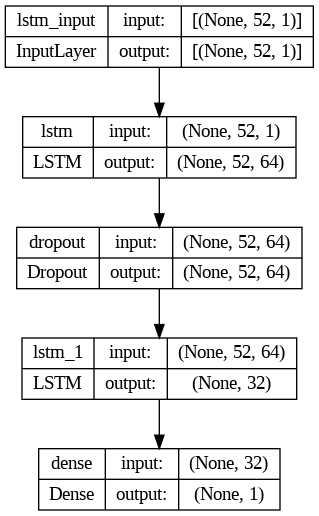

In [36]:
plot_model(model_USA_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history1 = model_USA_LSTM.fit(X_train1, y_train1, epochs=epoch, batch_size=batch_size, validation_data=(X_test1, y_test1), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 11s 732ms/step - loss: 0.7543 - mse: 0.5818 - rmse: 0.7628 - val_loss: 0.7292 - val_mse: 0.5437 - val_rmse: 0.7373 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 159ms/step - loss: 0.6986 - mse: 0.4999 - rmse: 0.7070 - val_loss: 0.6781 - val_mse: 0.4714 - val_rmse: 0.6866 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 1s 218ms/step - loss: 0.6518 - mse: 0.4359 - rmse: 0.6602 - val_loss: 0.6323 - val_mse: 0.4109 - val_rmse: 0.6410 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 167ms/step - loss: 0.6073 - mse: 0.3784 - rmse: 0.6152 - val_loss: 0.5844 - val_mse: 0.3523 - val_rmse: 0.5936 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 1s 194ms/step - loss: 0.5583 - mse: 0.3214 - rmse: 0.5669 - val_loss: 0.5338 - val_mse: 0.2954 - val_rmse: 0.5435 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 1s 182ms/step - loss: 0.5039 - mse: 0.2627 - rmse: 0.5126 - val_

In [38]:
yhat1 = model_USA_LSTM.predict(X_test1)

r21 = r2_score(y_test1,yhat1)
mse1 = mean_squared_error(y_test1, yhat1)
mae1 = mean_absolute_error(y_test1, yhat1)
mape1 = mean_absolute_percentage_error(y_test1, yhat1)
rmse1 = np.sqrt(mse1)

print("MAE : ","%.4f" % mae1)
print("MSE : ","%.4f" %  mse1)
print("RMSE : ","%.4f" % rmse1)
print("MAPE : ","%.4f" % mape1)
print("R2_score : ","%.4f" % r21)

2/2 [==============================] - 1s 22ms/step
MAE :  0.0549
MSE :  0.0071
RMSE :  0.0843
MAPE :  0.0985
R2_score :  0.4107


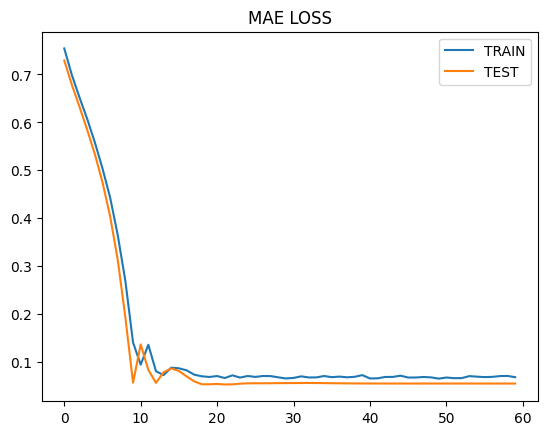

In [39]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [40]:
test_set1 = df_USA['PercentOfBaseline']
test_set1=pd.DataFrame(test_set1)
test_set1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [41]:
# Getting the predicted PercentOfBaseline
size_test1 = int(len(df_USA['PercentOfBaseline'])) + size_train1
dataset_total1 = pd.concat((training_set1['PercentOfBaseline'], test_set1['PercentOfBaseline']), axis = 0)
inputs1 = dataset_total1[len(dataset_total1) - len(test_set1) - size_train1:].values
inputs1 = inputs1.reshape(-1,1)
inputs1 = sc1.transform(inputs1)
X_test1 = []
for i in range(size_train1, size_test1):
    X_test1.append(inputs1[i-size_train1:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))
predicted_LSTM_USA = model_USA_LSTM.predict(X_test1)
predicted_LSTM_USA = sc1.inverse_transform(predicted_LSTM_USA)

4/9 [============>.................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 20ms/step


**Model USA ConvLSTM**

In [42]:
training_set2=df_USA['PercentOfBaseline']
training_set2=pd.DataFrame(training_set2)

In [43]:
# Feature Scaling
sc2 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled2 = sc2.fit_transform(training_set2)

In [44]:
# Creating a data structure with 52 timesteps and 1 output
X_train2 = []
y_train2 = []
size_train2 = int(len(df_USA['PercentOfBaseline'])*0.2)
for i in range(size_train2, len(training_set2)):
    X_train2.append(training_set_scaled2[i-size_train2:i, 0])
    y_train2.append(training_set_scaled2[i, 0])
X_train2, y_train2 = np.array(X_train2), np.array(y_train2)

In [45]:
# Reshaping
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.2, shuffle=True, random_state=42)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
X_train2.shape

(168, 52, 1)

In [46]:
# Initialising the CNN using LSTM
model_USA_ConvLSTM = Sequential()
model_USA_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(X_train2.shape[1],1)))
model_USA_ConvLSTM.add(AveragePooling1D(pool_size=3, strides=1, padding='same'))
model_USA_ConvLSTM.add(Dropout(0.2))
model_USA_ConvLSTM.add(LSTM(64, activation='relu', return_sequences = True))
model_USA_ConvLSTM.add(LSTM(32, activation='relu', return_sequences = False))
model_USA_ConvLSTM.add(Dense(1))
model_USA_ConvLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 64)            256       
                                                                 
 average_pooling1d (AverageP  (None, 52, 64)           0         
 ooling1D)                                                       
                                                                 
 dropout_1 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 52, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                      

In [47]:
# Compiling the RNN
# Code here
model_USA_ConvLSTM.compile(optimizer=Adamax(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

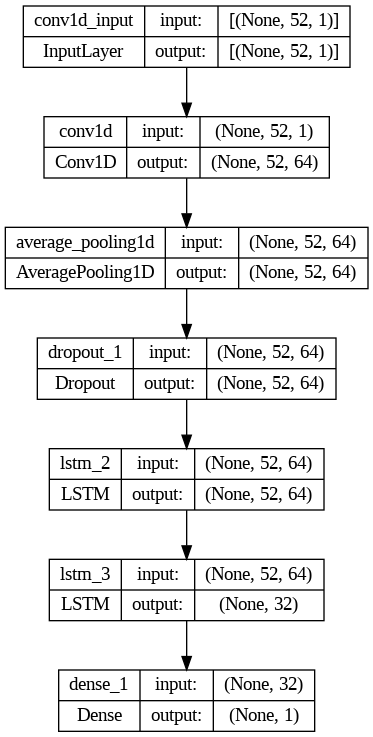

In [48]:
plot_model(model_USA_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [49]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history2 = model_USA_ConvLSTM.fit(X_train2, y_train2, epochs=epoch, batch_size=batch_size, validation_data=(X_test2, y_test2), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 5s 306ms/step - loss: 0.7155 - mse: 0.5238 - rmse: 0.7238 - val_loss: 0.6841 - val_mse: 0.4795 - val_rmse: 0.6925 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 123ms/step - loss: 0.6486 - mse: 0.4311 - rmse: 0.6565 - val_loss: 0.6149 - val_mse: 0.3891 - val_rmse: 0.6238 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 122ms/step - loss: 0.5756 - mse: 0.3411 - rmse: 0.5841 - val_loss: 0.5327 - val_mse: 0.2940 - val_rmse: 0.5422 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 96ms/step - loss: 0.4884 - mse: 0.2474 - rmse: 0.4974 - val_loss: 0.4312 - val_mse: 0.1946 - val_rmse: 0.4411 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 107ms/step - loss: 0.3795 - mse: 0.1531 - rmse: 0.3912 - val_loss: 0.2911 - val_mse: 0.0891 - val_rmse: 0.2984 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 99ms/step - loss: 0.2226 - mse: 0.0566 - rmse: 0.2380 - val_los

In [50]:
yhat2 = model_USA_ConvLSTM.predict(X_test2)

r22 = r2_score(y_test2,yhat2)
mse2 = mean_squared_error(y_test2, yhat2)
mae2 = mean_absolute_error(y_test2,yhat2)
mape2 = mean_absolute_percentage_error(y_test2,yhat2)
rmse2 = np.sqrt(mse2)

print("MAE :" ,"%.4f" %mae2)
print("MSE :", "%.4f" %mse2)
print("RMSE :" ,"%.4f" %rmse2)
print("MAPE :" ,"%.4f" %mape2)
print("R2_score :","%.4f" %r22)

2/2 [==============================] - 1s 21ms/step
MAE : 0.0561
MSE : 0.0069
RMSE : 0.0828
MAPE : 0.0985
R2_score : 0.4309


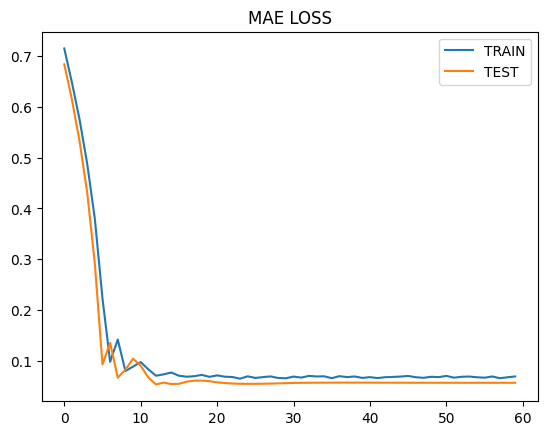

In [51]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [52]:
test_set2 = df_USA['PercentOfBaseline']
test_set2=pd.DataFrame(test_set2)
test_set2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [53]:
# Getting the predicted PercentOfBaseline
size_test2 = int(len(df_USA['PercentOfBaseline'])) + size_train2
dataset_total2 = pd.concat((training_set2['PercentOfBaseline'], test_set2['PercentOfBaseline']), axis = 0)
inputs2 = dataset_total2[len(dataset_total2) - len(test_set2) - size_train2:].values
inputs2 = inputs2.reshape(-1, 1)
inputs2 = sc2.transform(inputs2)
X_test2 = []
for i in range(size_train2, size_test2):
    X_test2.append(inputs2[i-size_train2:i, 0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))
predicted_ConvLSTM_USA = model_USA_ConvLSTM.predict(X_test2)
predicted_ConvLSTM_USA = sc2.inverse_transform(predicted_ConvLSTM_USA)

3/9 [=========>....................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 28ms/step


In [54]:
predicted_ConvLSTM_USA = pd.DataFrame(predicted_ConvLSTM_USA)
predicted_ConvLSTM_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


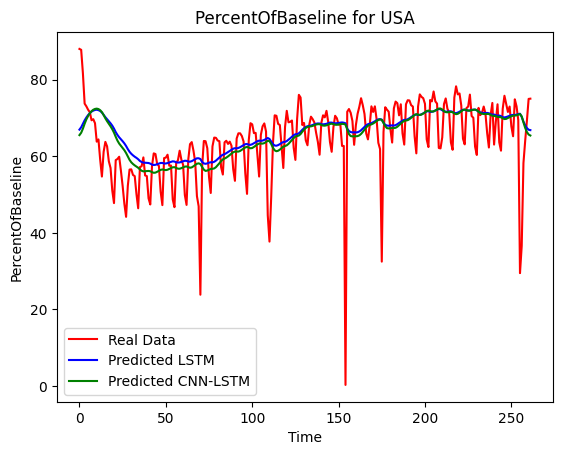

In [55]:
# Visualising the results
plt.plot(df_USA['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_USA, color = 'blue', label = 'Predicted LSTM')
plt.plot(predicted_ConvLSTM_USA, color = 'green', label = 'Predicted CNN-LSTM')
plt.title('PercentOfBaseline for USA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [56]:
MAE_LSTM_USA = mean_absolute_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
MSE_LSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
MAPE_LSTM_USA = mean_absolute_percentage_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
RMSE_LSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA, squared = False)
R2_LSTM_USA = r2_score(df_USA['PercentOfBaseline'].values, predicted_LSTM_USA)
print("MAE LSTM USA: ", "%.4f" % MAE_LSTM_USA)
print("MSE LSTM USA:", "%.4f" % MSE_LSTM_USA)
print("MAPE LSTM USA:", "%.4f" % MAPE_LSTM_USA)
print("RMSE LSTM USA:", "%.4f" % RMSE_LSTM_USA)
print("R2 LSTM USA:", "%.4f" % R2_LSTM_USA)

MAE LSTM USA:  5.8377
MSE LSTM USA: 82.2517
MAPE LSTM USA: 1.1459
RMSE LSTM USA: 9.0693
R2 LSTM USA: 0.1683


In [57]:
MAE_ConvLSTM_USA = mean_absolute_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
MSE_ConvLSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
MAPE_ConvLSTM_USA = mean_absolute_percentage_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
RMSE_ConvLSTM_USA = mean_squared_error(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA, squared = False)
R2_ConvLSTM_USA = r2_score(df_USA['PercentOfBaseline'].values, predicted_ConvLSTM_USA)
print("MAE ConvLSTM USA:", "%.4f" % MAE_ConvLSTM_USA)
print("MSE ConvSTM USA:", "%.4f" % MSE_ConvLSTM_USA)
print("MAPE ConvLSTM USA:", "%.4f" % MAPE_ConvLSTM_USA)
print("RMSE ConvLSTM USA:", "%.4f" % RMSE_ConvLSTM_USA)
print("R2 ConvLSTM USA:", "%.4f" % R2_ConvLSTM_USA)

MAE ConvLSTM USA: 5.9269
MSE ConvSTM USA: 81.2233
MAPE ConvLSTM USA: 1.1408
RMSE ConvLSTM USA: 9.0124
R2 ConvLSTM USA: 0.1787


**DATASET AUSTRALIA**

In [58]:
dataset_AU = dataset[dataset['Country']=='Australia'].sort_values(by="Date")
dataset_AU.shape

(257, 11)

In [59]:
dataset_AU.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
19,Daily,2020-03-16,1.0,Kingsford Smith,92,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
49,Daily,2020-03-17,1.0,Kingsford Smith,90,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
60,Daily,2020-03-18,1.0,Kingsford Smith,97,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
107,Daily,2020-03-19,1.0,Kingsford Smith,89,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
118,Daily,2020-03-20,1.0,Kingsford Smith,85,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [60]:
dataset_AU.nunique()

AggregationMethod      1
Date                 257
Version                1
AirportName            1
PercentOfBaseline     65
Centroid               1
City                   1
State                  1
ISO_3166_2             1
Country                1
Geography              1
dtype: int64

In [61]:
dataset_AU = dataset_AU.set_index('Date')

In [62]:
df_AU = pd.DataFrame(dataset_AU.groupby('Date')['PercentOfBaseline'].mean())
df_AU.shape

(257, 1)

In [63]:
df_AU.head()

,PercentOfBaseline
Date,
2020-03-16,92.0
2020-03-17,90.0
2020-03-18,97.0
2020-03-19,89.0
2020-03-20,85.0


**Model AUSTRALIA LSTM**

In [64]:
training_set3=df_AU['PercentOfBaseline']
training_set3=pd.DataFrame(training_set3)

In [65]:
# Feature Scaling
sc3 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled3 = sc3.fit_transform(training_set3)

In [66]:
# Creating a data structure with 52 timesteps and 1 output
X_train3 = []
y_train3 = []
size_train3 = int(len(df_AU['PercentOfBaseline'])*0.2)
for i in range(size_train3, len(training_set3)):
    X_train3.append(training_set_scaled3[i-size_train3:i, 0])
    y_train3.append(training_set_scaled3[i, 0])
X_train3, y_train3 = np.array(X_train3), np.array(y_train3)

In [67]:
# Reshaping
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train3, y_train3, test_size = 0.2, shuffle=True, random_state=42)
X_train3 = np.reshape(X_train3, (X_train3.shape[0], X_train3.shape[1], 1))
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
print(X_train3.shape)

(164, 51, 1)


In [68]:
# Initialising the RNN using LSTM
model_AU_LSTM = Sequential()
model_AU_LSTM.add(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train3.shape[1], 1)))
model_AU_LSTM.add(Dropout(0.2))
model_AU_LSTM.add(LSTM(32, activation="relu", return_sequences = False))
model_AU_LSTM.add(Dense(1))
model_AU_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 51, 64)            16896     
                                                                 
 dropout_2 (Dropout)         (None, 51, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compiling the RNN
# Code here
model_AU_LSTM.compile(optimizer=RMSprop(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

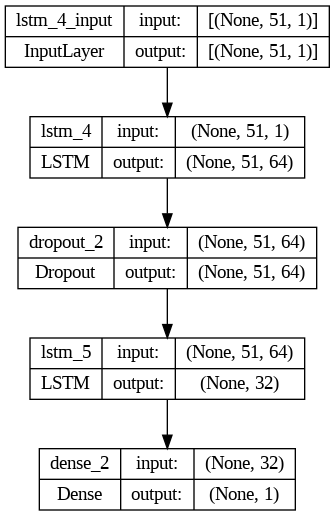

In [70]:
plot_model(model_AU_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [71]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history3 = model_AU_LSTM.fit(X_train3, y_train3, epochs=epoch, batch_size=batch_size, validation_data=(X_test3, y_test3), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 4s 287ms/step - loss: 0.2585 - mse: 0.1016 - rmse: 0.3187 - val_loss: 0.1380 - val_mse: 0.0377 - val_rmse: 0.1941 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 97ms/step - loss: 0.1229 - mse: 0.0308 - rmse: 0.1755 - val_loss: 0.1113 - val_mse: 0.0197 - val_rmse: 0.1405 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 96ms/step - loss: 0.1056 - mse: 0.0185 - rmse: 0.1360 - val_loss: 0.0925 - val_mse: 0.0136 - val_rmse: 0.1165 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 86ms/step - loss: 0.1128 - mse: 0.0235 - rmse: 0.1532 - val_loss: 0.1011 - val_mse: 0.0156 - val_rmse: 0.1248 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 85ms/step - loss: 0.0916 - mse: 0.0144 - rmse: 0.1201 - val_loss: 0.0850 - val_mse: 0.0134 - val_rmse: 0.1159 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 95ms/step - loss: 0.0816 - mse: 0.0122 - rmse: 0.1104 - val_loss: 

In [72]:
yhat3 = model_AU_LSTM.predict(X_test3)

r23 = r2_score(y_test3,yhat3)
mse3 = mean_squared_error(y_test3, yhat3)
mae3 = mean_absolute_error(y_test3,yhat3)
mape3 = mean_absolute_percentage_error(y_test3,yhat3)
rmse3 = np.sqrt(mse3)

print("MAE :" ,"%.4f" %mae3)
print("MSE :", "%.4f" %mse3)
print("RMSE :" ,"%.4f" %rmse3)
print("MAPE :" ,"%.4f" %mape3)
print("R2_score :","%.4f" %r23)

2/2 [==============================] - 0s 13ms/step
MAE : 0.0738
MSE : 0.0139
RMSE : 0.1181
MAPE : 12496053157108.3145
R2_score : 0.5685


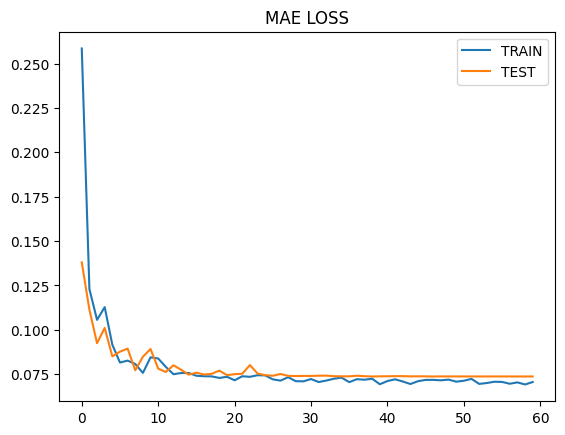

In [73]:
plt.plot(history3.history["loss"])
plt.plot(history3.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [74]:
test_set3 = df_AU['PercentOfBaseline']
test_set3=pd.DataFrame(test_set3)
test_set3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [75]:
# Getting the predicted PercentOfBaseline
size_test3 = int(len(df_AU['PercentOfBaseline'])) + size_train3
dataset_total3 = pd.concat((training_set3['PercentOfBaseline'], test_set3['PercentOfBaseline']), axis = 0)
inputs3 = dataset_total3[len(dataset_total3) - len(test_set3) - size_train3:].values
inputs3 = inputs3.reshape(-1,1)
inputs3 = sc3.transform(inputs3)
X_test3 = []
for i in range(size_train3, size_test3):
    X_test3.append(inputs3[i-size_train3:i, 0])
X_test3 = np.array(X_test3)
X_test3 = np.reshape(X_test3, (X_test3.shape[0], X_test3.shape[1], 1))
predicted_LSTM_AU = model_AU_LSTM.predict(X_test3)
predicted_LSTM_AU = sc3.inverse_transform(predicted_LSTM_AU)

5/9 [===============>..............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 16ms/step


In [76]:
predicted_LSTM_AU=pd.DataFrame(predicted_LSTM_AU)
predicted_LSTM_AU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


**Model Australia ConvLSTM**

In [77]:
training_set4=df_AU['PercentOfBaseline']
training_set4=pd.DataFrame(training_set4)

In [78]:
# Feature Scaling
sc4 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled4 = sc4.fit_transform(training_set4)

In [79]:
# Creating a data structure with 52 timesteps and 1 output
X_train4 = []
y_train4 = []
size_train4 = int(len(df_USA['PercentOfBaseline'])*0.2)
for i in range(size_train4, len(training_set4)):
    X_train4.append(training_set_scaled4[i-size_train4:i, 0])
    y_train4.append(training_set_scaled4[i, 0])
X_train4, y_train4 = np.array(X_train4), np.array(y_train4)

In [80]:
# Reshaping
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_train4, y_train4, test_size = 0.2, shuffle=True, random_state=42)
X_train4 = np.reshape(X_train4, (X_train4.shape[0], X_train4.shape[1], 1))
X_test4 = np.reshape(X_test4, (X_test4.shape[0], X_test4.shape[1], 1))
print(X_train4.shape)

(164, 52, 1)


In [81]:
# Initialising the CNN using LSTM
model_AU_ConvLSTM = Sequential()
model_AU_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(X_train4.shape[1],1)))
model_AU_ConvLSTM.add(AveragePooling1D(pool_size=3, strides=1, padding='same'))
model_AU_ConvLSTM.add(Dropout(0.2))
model_AU_ConvLSTM.add(LSTM(64, activation="relu", return_sequences = True))
model_AU_ConvLSTM.add(LSTM(32, activation="relu", return_sequences = False))
model_AU_ConvLSTM.add(Dense(1))
model_AU_ConvLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 52, 64)            256       
                                                                 
 average_pooling1d_1 (Averag  (None, 52, 64)           0         
 ePooling1D)                                                     
                                                                 
 dropout_3 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_6 (LSTM)               (None, 52, 64)            33024     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                      

In [82]:
# Compiling the RNN
# Code here
model_AU_ConvLSTM.compile(optimizer=RMSprop(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

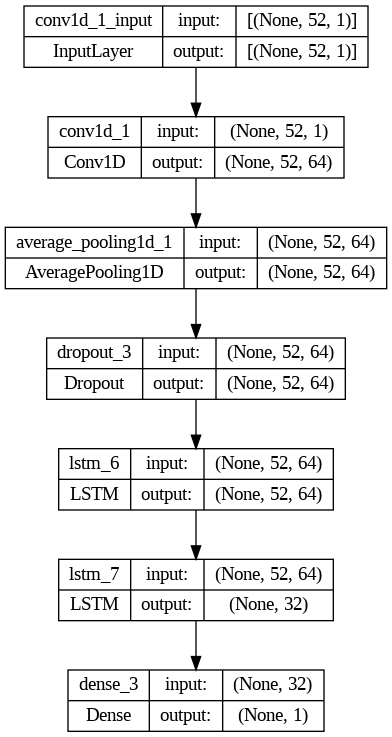

In [83]:
plot_model(model_AU_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [84]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history4 = model_AU_ConvLSTM.fit(X_train4, y_train4, epochs=epoch, batch_size=batch_size, validation_data=(X_test4, y_test4), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 4s 317ms/step - loss: 0.2304 - mse: 0.0833 - rmse: 0.2886 - val_loss: 0.0892 - val_mse: 0.0134 - val_rmse: 0.1157 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 102ms/step - loss: 0.1016 - mse: 0.0182 - rmse: 0.1349 - val_loss: 0.0999 - val_mse: 0.0177 - val_rmse: 0.1331 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 100ms/step - loss: 0.1057 - mse: 0.0193 - rmse: 0.1389 - val_loss: 0.0814 - val_mse: 0.0118 - val_rmse: 0.1085 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 96ms/step - loss: 0.0827 - mse: 0.0114 - rmse: 0.1068 - val_loss: 0.0874 - val_mse: 0.0126 - val_rmse: 0.1122 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 126ms/step - loss: 0.0849 - mse: 0.0132 - rmse: 0.1149 - val_loss: 0.0804 - val_mse: 0.0113 - val_rmse: 0.1061 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 157ms/step - loss: 0.0918 - mse: 0.0152 - rmse: 0.1234 - val_lo

In [85]:
yhat4 = model_AU_ConvLSTM.predict(X_test4)

r24 = r2_score(y_test4,yhat4)
mse4 = mean_squared_error(y_test4, yhat4)
mae4 = mean_absolute_error(y_test4,yhat4)
mape4 = mean_absolute_percentage_error(y_test4,yhat4)
rmse4 = np.sqrt(mse4)

print("MAE :" ,"%.4f" %mae4)
print("MSE :", "%.4f" %mse4)
print("RMSE :" ,"%.4f" %rmse4)
print("MAPE :" ,"%.4f" %mape4)
print("R2_score :","%.4f" %r24)

2/2 [==============================] - 0s 14ms/step
MAE : 0.0737
MSE : 0.0127
RMSE : 0.1127
MAPE : 12550305276104.3008
R2_score : 0.5704


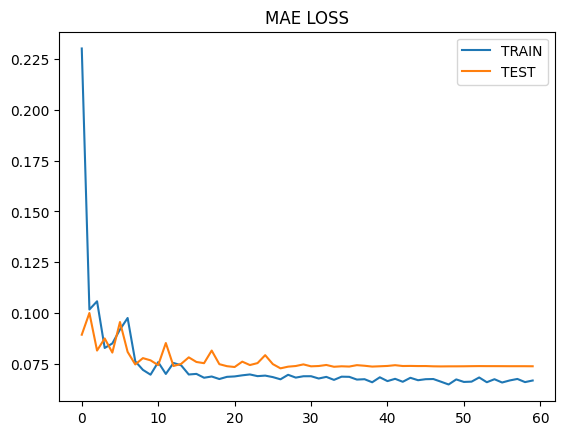

In [86]:
plt.plot(history4.history["loss"])
plt.plot(history4.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [87]:
test_set4 = df_AU['PercentOfBaseline']
test_set4=pd.DataFrame(test_set4)
test_set4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  257 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


In [88]:
# Getting the predicted PercentOfBaseline
size_test4 = int(len(df_AU['PercentOfBaseline'])) + size_train4
dataset_total4 = pd.concat((training_set4['PercentOfBaseline'], test_set4['PercentOfBaseline']), axis = 0)
inputs4 = dataset_total4[len(dataset_total4) - len(test_set4) - size_train4:].values
inputs4 = inputs4.reshape(-1, 1)
inputs4 = sc4.transform(inputs4)
X_test4 = []
for i in range(size_train4, size_test4):
    X_test4.append(inputs4[i-size_train4:i, 0])
X_test4 = np.array(X_test4)
X_test4 = np.reshape(X_test4, (X_test4.shape[0], X_test4.shape[1], 1))
predicted_ConvLSTM_AU = model_AU_ConvLSTM.predict(X_test4)
predicted_ConvLSTM_AU = sc4.inverse_transform(predicted_ConvLSTM_AU)

4/9 [============>.................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 18ms/step


In [89]:
predicted_ConvLSTM_AU = pd.DataFrame(predicted_ConvLSTM_AU)
predicted_ConvLSTM_AU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


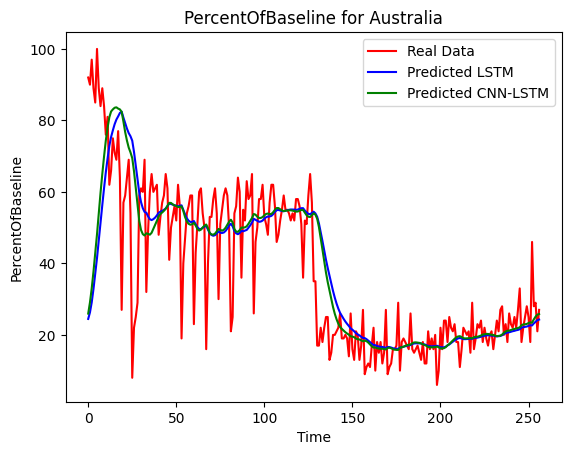

In [90]:
# Visualising the results
plt.plot(df_AU['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_AU, color = 'blue', label = 'Predicted LSTM')
plt.plot(predicted_ConvLSTM_AU, color = 'green', label = 'Predicted CNN-LSTM')
plt.title('PercentOfBaseline for Australia')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [91]:
MAE_LSTM_AU = mean_absolute_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
MSE_LSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
MAPE_LSTM_AU = mean_absolute_percentage_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
RMSE_LSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU, squared = False)
R2_LSTM_AU = r2_score(df_AU['PercentOfBaseline'].values, predicted_LSTM_AU)
print("MAE LSTM AU:", "%.4f" %MAE_LSTM_AU)
print("MSE LSTM AU:", "%.4f" %MSE_LSTM_AU)
print("MAPE LSTM AU:", "%.4f" %MAPE_LSTM_AU)
print("RMSE LSTM AU:", "%.4f" %RMSE_LSTM_AU)
print("R2 LSTM AU:", "%.4f" %R2_LSTM_AU)

MAE LSTM AU: 9.5064
MSE LSTM AU: 248.5155
MAPE LSTM AU: 0.3343
RMSE LSTM AU: 15.7644
R2 LSTM AU: 0.4750


In [92]:
MAE_ConvLSTM_AU = mean_absolute_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
MSE_ConvLSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
MAPE_ConvLSTM_AU = mean_absolute_percentage_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
RMSE_ConvLSTM_AU = mean_squared_error(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU, squared = False)
R2_ConvLSTM_AU = r2_score(df_AU['PercentOfBaseline'].values, predicted_ConvLSTM_AU)
print("MAE ConvLSTM AU:", "%.4f" % MAE_ConvLSTM_AU)
print("MSE ConvSTM AU:", "%.4f" % MSE_ConvLSTM_AU)
print("MAPE ConvLSTM AU:", "%.4f" % MAPE_ConvLSTM_AU)
print("RMSE ConvLSTM AU:", "%.4f" % RMSE_ConvLSTM_AU)
print("R2 ConvLSTM AU:", "%.4f" % R2_ConvLSTM_AU)

MAE ConvLSTM AU: 9.0448
MSE ConvSTM AU: 218.8431
MAPE ConvLSTM AU: 0.3143
RMSE ConvLSTM AU: 14.7933
R2 ConvLSTM AU: 0.5377


**DATASET CHILE**

In [93]:
dataset_CH = dataset[dataset['Country']=='Chile'].sort_values(by="Date")
dataset_CH.shape

(238, 11)

In [94]:
dataset_CH.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-03-16,1.0,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
44,Daily,2020-03-17,1.0,Santiago International Airport,72,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
72,Daily,2020-03-18,1.0,Santiago International Airport,56,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
103,Daily,2020-03-19,1.0,Santiago International Airport,52,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."
135,Daily,2020-03-20,1.0,Santiago International Airport,53,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ..."


In [95]:
dataset_CH.nunique()

AggregationMethod      1
Date                 238
Version                1
AirportName            1
PercentOfBaseline     61
Centroid               1
City                   1
State                  1
ISO_3166_2             1
Country                1
Geography              1
dtype: int64

In [96]:
dataset_CH = dataset_CH.set_index('Date')

In [97]:
df_CH = pd.DataFrame(dataset_CH.groupby('Date')['PercentOfBaseline'].mean())
df_CH.shape

(238, 1)

In [98]:
df_CH.head()

,PercentOfBaseline
Date,
2020-03-16,96.0
2020-03-17,72.0
2020-03-18,56.0
2020-03-19,52.0
2020-03-20,53.0


**Model CHILE LSTM**

In [99]:
training_set5=df_CH['PercentOfBaseline']
training_set5=pd.DataFrame(training_set5)

In [100]:
# Feature Scaling
sc5 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled5 = sc5.fit_transform(training_set5)

In [101]:
# Creating a data structure with 52 timesteps and 1 output
X_train5 = []
y_train5 = []
size_train5 = int(len(df_CH['PercentOfBaseline'])*0.2)
for i in range(size_train5, len(training_set5)):
    X_train5.append(training_set_scaled5[i-size_train5:i, 0])
    y_train5.append(training_set_scaled5[i, 0])
X_train5, y_train5 = np.array(X_train5), np.array(y_train5)

In [102]:
# Reshaping
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_train5, y_train5, test_size = 0.2, shuffle=True, random_state=42)
X_train5 = np.reshape(X_train5, (X_train5.shape[0], X_train5.shape[1], 1))
X_test5 = np.reshape(X_test5, (X_test5.shape[0], X_test5.shape[1], 1))
print(X_train5.shape)

(152, 47, 1)


In [103]:
# Initialising the RNN using LSTM
model_CH_LSTM = Sequential()
model_CH_LSTM.add(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train5.shape[1], 1)))
model_CH_LSTM.add(Dropout(0.2))
model_CH_LSTM.add(LSTM(32, activation="relu", return_sequences = False))
model_CH_LSTM.add(Dense(1))
model_CH_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 47, 64)            16896     
                                                                 
 dropout_4 (Dropout)         (None, 47, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [104]:
# Compiling the RNN
# Code here
model_CH_LSTM.compile(optimizer=Adam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

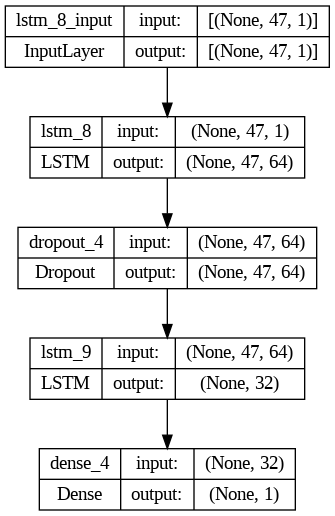

In [105]:
plot_model(model_CH_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [106]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history5 = model_CH_LSTM.fit(X_train5, y_train5, epochs=epoch, batch_size=batch_size, validation_data=(X_test5, y_test5), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 3s 296ms/step - loss: 0.3343 - mse: 0.1329 - rmse: 0.3646 - val_loss: 0.3013 - val_mse: 0.1122 - val_rmse: 0.3350 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 80ms/step - loss: 0.2892 - mse: 0.1036 - rmse: 0.3219 - val_loss: 0.2500 - val_mse: 0.0811 - val_rmse: 0.2847 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 82ms/step - loss: 0.2363 - mse: 0.0738 - rmse: 0.2717 - val_loss: 0.1914 - val_mse: 0.0507 - val_rmse: 0.2252 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 88ms/step - loss: 0.1722 - mse: 0.0437 - rmse: 0.2092 - val_loss: 0.1299 - val_mse: 0.0239 - val_rmse: 0.1545 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 84ms/step - loss: 0.1105 - mse: 0.0197 - rmse: 0.1402 - val_loss: 0.0905 - val_mse: 0.0144 - val_rmse: 0.1200 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 86ms/step - loss: 0.1011 - mse: 0.0158 - rmse: 0.1258 - val_loss: 

In [107]:
yhat5 = model_CH_LSTM.predict(X_test5)

r25 = r2_score(y_test5,yhat5)
mse5 = mean_squared_error(y_test5, yhat5)
mae5 = mean_absolute_error(y_test5,yhat5)
mape5 = mean_absolute_percentage_error(y_test5,yhat5)
rmse5 = np.sqrt(mse5)

print("MAE :" ,"%.4f" %mae5)
print("MSE :","%.4f" %mse5)
print("RMSE :" ,"%.4f" %rmse5)
print("MAPE :" ,"%.4f" %mape5)
print("R2_score :","%.4f" %r25)

2/2 [==============================] - 0s 14ms/step
MAE : 0.0869
MSE : 0.0125
RMSE : 0.1119
MAPE : 0.4379
R2_score : 0.4626


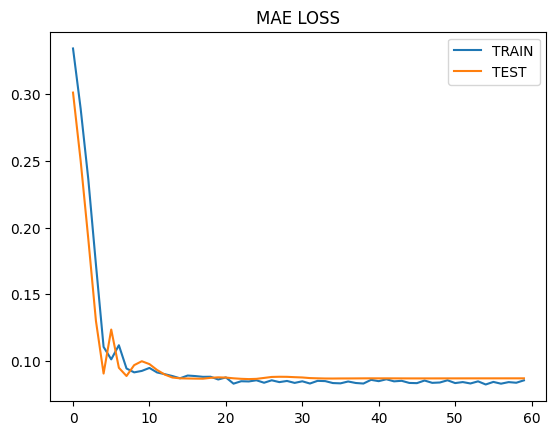

In [108]:
plt.plot(history5.history["loss"])
plt.plot(history5.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [109]:
test_set5 = df_CH['PercentOfBaseline']
test_set5=pd.DataFrame(test_set5)
test_set5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  238 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [110]:
# Getting the predicted PercentOfBaseline
size_test5 = int(len(df_CH['PercentOfBaseline'])) + size_train5
dataset_total5 = pd.concat((training_set5['PercentOfBaseline'], test_set5['PercentOfBaseline']), axis = 0)
inputs5 = dataset_total5[len(dataset_total5) - len(test_set5) - size_train5:].values
inputs5 = inputs5.reshape(-1,1)
inputs5 = sc5.transform(inputs5)
X_test5 = []
for i in range(size_train5, size_test5):
    X_test5.append(inputs5[i-size_train5:i, 0])
X_test5 = np.array(X_test5)
X_test5 = np.reshape(X_test5, (X_test5.shape[0], X_test5.shape[1], 1))
predicted_LSTM_CH = model_CH_LSTM.predict(X_test5)
predicted_LSTM_CH = sc5.inverse_transform(predicted_LSTM_CH)

8/8 [==============================] - 0s 16ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [111]:
predicted_LSTM_CH=pd.DataFrame(predicted_LSTM_CH)
predicted_LSTM_CH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


**Model CHILE ConvLSTM**

In [112]:
training_set6=df_CH['PercentOfBaseline']
training_set6=pd.DataFrame(training_set6)

In [113]:
# Feature Scaling
sc6 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled6 = sc6.fit_transform(training_set6)

In [114]:
# Creating a data structure with 52 timesteps and 1 output
X_train6 = []
y_train6 = []
size_train6 = int(len(df_CH['PercentOfBaseline'])*0.2)
for i in range(size_train6, len(training_set6)):
    X_train6.append(training_set_scaled6[i-size_train6:i, 0])
    y_train6.append(training_set_scaled6[i, 0])
X_train6, y_train6 = np.array(X_train6), np.array(y_train6)

In [115]:
# Reshaping
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_train6, y_train6, test_size = 0.2, shuffle=True, random_state=42)
X_train6 = np.reshape(X_train6, (X_train6.shape[0], X_train6.shape[1], 1))
X_test6 = np.reshape(X_test6, (X_test6.shape[0], X_test6.shape[1], 1))
print(X_train6.shape)

(152, 47, 1)


In [116]:
# Initialising the CNN using LSTM
model_CH_ConvLSTM = Sequential()
model_CH_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(X_train6.shape[1],1)))
model_CH_ConvLSTM.add(AveragePooling1D(pool_size=3, strides=1, padding='same'))
model_CH_ConvLSTM.add(Dropout(0.2))
model_CH_ConvLSTM.add(LSTM(64, activation="relu", return_sequences = True))
model_CH_ConvLSTM.add(LSTM(32, activation="relu", return_sequences = False))
model_CH_ConvLSTM.add(Dense(1))
model_CH_ConvLSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 47, 64)            256       
                                                                 
 average_pooling1d_2 (Averag  (None, 47, 64)           0         
 ePooling1D)                                                     
                                                                 
 dropout_5 (Dropout)         (None, 47, 64)            0         
                                                                 
 lstm_10 (LSTM)              (None, 47, 64)            33024     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                      

In [117]:
# Compiling the RNN
# Code here
model_CH_ConvLSTM.compile(optimizer=Nadam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

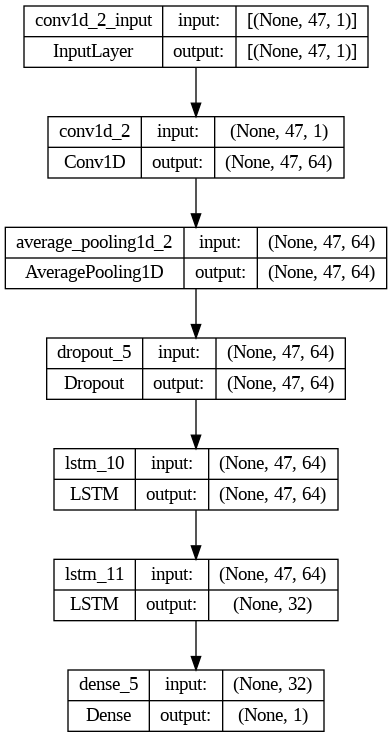

In [118]:
plot_model(model_CH_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [119]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history6 = model_CH_ConvLSTM.fit(X_train6, y_train6, epochs=epoch, batch_size=batch_size, validation_data=(X_test6, y_test6), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 6s 499ms/step - loss: 0.3546 - mse: 0.1480 - rmse: 0.3847 - val_loss: 0.3354 - val_mse: 0.1355 - val_rmse: 0.3682 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 166ms/step - loss: 0.3283 - mse: 0.1294 - rmse: 0.3597 - val_loss: 0.2997 - val_mse: 0.1117 - val_rmse: 0.3341 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 160ms/step - loss: 0.2822 - mse: 0.0993 - rmse: 0.3152 - val_loss: 0.2127 - val_mse: 0.0615 - val_rmse: 0.2480 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 162ms/step - loss: 0.1632 - mse: 0.0398 - rmse: 0.1995 - val_loss: 0.1114 - val_mse: 0.0222 - val_rmse: 0.1489 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 168ms/step - loss: 0.1180 - mse: 0.0222 - rmse: 0.1491 - val_loss: 0.0907 - val_mse: 0.0145 - val_rmse: 0.1202 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 166ms/step - loss: 0.0873 - mse: 0.0117 - rmse: 0.1082 - val_l

In [120]:
yhat6 = model_CH_ConvLSTM.predict(X_test6)

r26 = r2_score(y_test6,yhat6)
mse6 = mean_squared_error(y_test6, yhat6)
mae6 = mean_absolute_error(y_test6,yhat6)
mape6 = mean_absolute_percentage_error(y_test6,yhat6)
rmse6 = np.sqrt(mse6)

print("MAE :" ,"%.4f" %mae6)
print("MSE :", "%.4f" %mse6)
print("RMSE :" ,"%.4f" %rmse6)
print("MAPE :" ,"%.4f" %mape6)
print("R2_score :","%.4f" %r26)

2/2 [==============================] - 0s 13ms/step
MAE : 0.0884
MSE : 0.0127
RMSE : 0.1129
MAPE : 0.4373
R2_score : 0.4531


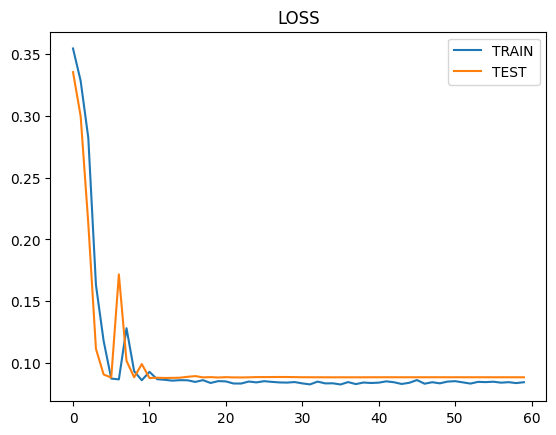

In [121]:
plt.plot(history6.history["loss"])
plt.plot(history6.history["val_loss"])
plt.title("LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [122]:
test_set6 = df_CH['PercentOfBaseline']
test_set6=pd.DataFrame(test_set6)
test_set6.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 238 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  238 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [123]:
# Getting the predicted PercentOfBaseline
size_test6 = int(len(df_CH['PercentOfBaseline'])) + size_train6
dataset_total6 = pd.concat((training_set6['PercentOfBaseline'], test_set6['PercentOfBaseline']), axis = 0)
inputs6 = dataset_total6[len(dataset_total6) - len(test_set6) - size_train6:].values
inputs6 = inputs6.reshape(-1, 1)
inputs6 = sc6.transform(inputs6)
X_test6 = []
for i in range(size_train6, size_test6):
    X_test6.append(inputs6[i-size_train6:i, 0])
X_test6 = np.array(X_test6)
X_test6 = np.reshape(X_test6, (X_test6.shape[0], X_test6.shape[1], 1))
predicted_ConvLSTM_CH = model_CH_ConvLSTM.predict(X_test6)
predicted_ConvLSTM_CH = sc6.inverse_transform(predicted_ConvLSTM_CH)

7/8 [=========================>....] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


8/8 [==============================] - 0s 19ms/step


In [124]:
predicted_ConvLSTM_CH = pd.DataFrame(predicted_ConvLSTM_CH)
predicted_ConvLSTM_CH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


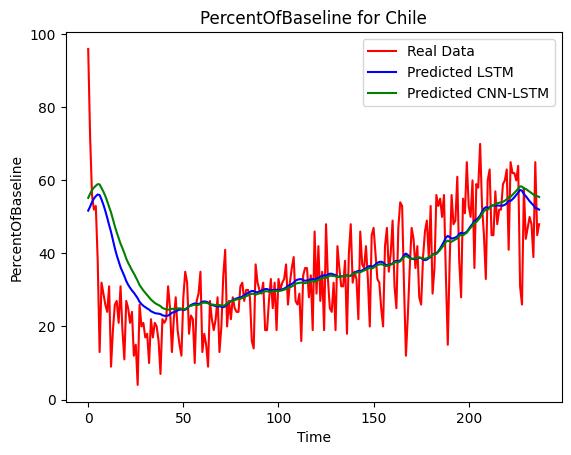

In [125]:
# Visualising the results
plt.plot(df_CH['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_CH, color = 'blue', label = 'Predicted LSTM')
plt.plot(predicted_ConvLSTM_CH, color = 'green', label = 'Predicted CNN-LSTM')
plt.title('PercentOfBaseline for Chile')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [126]:
MAE_LSTM_CH = mean_absolute_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
MSE_LSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
MAPE_LSTM_CH = mean_absolute_percentage_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
RMSE_LSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH, squared = False)
R2_LSTM_CH = r2_score(df_CH['PercentOfBaseline'].values, predicted_LSTM_CH)
print("MAE LSTM CH:", "%.4f" %MAE_LSTM_CH)
print("MSE LSTM CH:", "%.4f" %MSE_LSTM_CH)
print("MAPE LSTM CH:", "%.4f" %MAPE_LSTM_CH)
print("RMSE LSTM CH:", "%.4f" %RMSE_LSTM_CH)
print("R2 LSTM CH:", "%.4f" %R2_LSTM_CH)

MAE LSTM CH: 8.7162
MSE LSTM CH: 130.0280
MAPE LSTM CH: 0.3788
RMSE LSTM CH: 11.4030
R2 LSTM CH: 0.4123


In [127]:
MAE_ConvLSTM_CH = mean_absolute_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
MSE_ConvLSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
MAPE_ConvLSTM_CH = mean_absolute_percentage_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
RMSE_ConvLSTM_CH = mean_squared_error(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH, squared = False)
R2_ConvLSTM_CH = r2_score(df_CH['PercentOfBaseline'].values, predicted_ConvLSTM_CH)
print("MAE ConvSTM CH:", "%.4f" % MAE_ConvLSTM_CH)
print("MSE ConvSTM CH:", "%.4f" % MSE_ConvLSTM_CH)
print("MAPE ConvLSTM CH:", "%.4f" % MAPE_ConvLSTM_CH)
print("RMSE ConvLSTM CH:", "%.4f" % RMSE_ConvLSTM_CH)
print("R2 ConvLSTM CH:", "%.4f" % R2_ConvLSTM_CH)

MAE ConvSTM CH: 9.4026
MSE ConvSTM CH: 150.7472
MAPE ConvLSTM CH: 0.4173
RMSE ConvLSTM CH: 12.2779
R2 ConvLSTM CH: 0.3187


**DATASET CANADA**

In [128]:
dataset_CN = dataset[dataset['Country']=='Canada'].sort_values(by="Date")
dataset_CN.shape

(2311, 11)

In [129]:
dataset_CN.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
1,Daily,2020-03-16,1.0,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -..."
7,Daily,2020-03-16,1.0,Edmonton International,63,POINT(-113.576260685047 53.308783097969),Leduc County,Alberta,CA-AB,Canada,"POLYGON((-113.568120002747 53.3110445425655, -..."
10,Daily,2020-03-16,1.0,Montreal Mirabel,100,POINT(-74.048379779338 45.6815027038316),Mirabel,Quebec,CA-QC,Canada,"POLYGON((-74.0895652770996 45.6856314730097, -..."
11,Daily,2020-03-16,1.0,Vancouver International,100,POINT(-123.17754124324 49.1935788600694),Richmond,British Columbia,CA-BC,Canada,"POLYGON((-123.136525154114 49.1980971490671, -..."
20,Daily,2020-03-16,1.0,Montreal Trudeau,100,POINT(-73.7424121584688 45.4678436940192),Dorval,Quebec,CA-QC,Canada,"POLYGON((-73.751757144928 45.44954912446, -73...."


In [130]:
dataset_CN.nunique()

AggregationMethod      1
Date                 262
Version                1
AirportName            9
PercentOfBaseline     95
Centroid               9
City                   9
State                  6
ISO_3166_2             6
Country                1
Geography              9
dtype: int64

In [131]:
dataset_CN = dataset_CN.set_index('Date')

In [132]:
df_CN = pd.DataFrame(dataset_CN.groupby('Date')['PercentOfBaseline'].mean())
df_CN.shape

(262, 1)

In [133]:
df_CN.head()

,PercentOfBaseline
Date,
2020-03-16,92.333333
2020-03-17,87.888889
2020-03-18,88.000000
2020-03-19,84.777778
2020-03-20,86.666667


**Model CANADA LSTM**

In [134]:
training_set7=df_CN['PercentOfBaseline']
training_set7=pd.DataFrame(training_set7)

In [135]:
# Feature Scaling
sc7 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled7 = sc7.fit_transform(training_set7)

In [136]:
# Creating a data structure with 52 timesteps and 1 output
X_train7 = []
y_train7 = []
size_train7 = int(len(df_CN['PercentOfBaseline'])*0.2)
for i in range(size_train7, len(training_set7)):
    X_train7.append(training_set_scaled7[i-size_train7:i, 0])
    y_train7.append(training_set_scaled7[i, 0])
X_train7, y_train7 = np.array(X_train7), np.array(y_train7)

In [137]:
# Reshaping
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_train7, y_train7, test_size = 0.2, shuffle=True, random_state=42)
X_train7 = np.reshape(X_train7, (X_train7.shape[0], X_train7.shape[1], 1))
X_test7 = np.reshape(X_test7, (X_test7.shape[0], X_test7.shape[1], 1))
print(X_train7.shape)

(168, 52, 1)


In [138]:
# Initialising the RNN using LSTM
model_CN_LSTM = Sequential()
model_CN_LSTM.add(LSTM(64, activation="relu", return_sequences = True, input_shape = (X_train7.shape[1], 1)))
model_CN_LSTM.add(Dropout(0.2))
model_CN_LSTM.add(LSTM(32, activation="relu", return_sequences = False))
model_CN_LSTM.add(Dense(1))
model_CN_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 52, 64)            16896     
                                                                 
 dropout_6 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [139]:
# Compiling the RNN
# Code here
model_CN_LSTM.compile(optimizer=Nadam(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

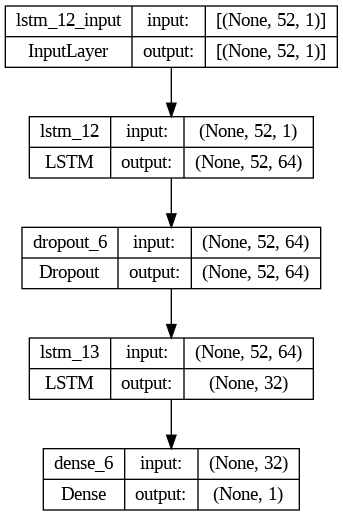

In [140]:
plot_model(model_CN_LSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [141]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history7 = model_CN_LSTM.fit(X_train7, y_train7, epochs=epoch, batch_size=batch_size, validation_data=(X_test7, y_test7), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 5s 295ms/step - loss: 0.7904 - mse: 0.6474 - rmse: 0.8046 - val_loss: 0.7703 - val_mse: 0.6121 - val_rmse: 0.7824 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 0s 94ms/step - loss: 0.7384 - mse: 0.5663 - rmse: 0.7526 - val_loss: 0.7111 - val_mse: 0.5242 - val_rmse: 0.7240 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 112ms/step - loss: 0.6693 - mse: 0.4689 - rmse: 0.6848 - val_loss: 0.5990 - val_mse: 0.3772 - val_rmse: 0.6142 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 91ms/step - loss: 0.5290 - mse: 0.2980 - rmse: 0.5459 - val_loss: 0.2496 - val_mse: 0.0735 - val_rmse: 0.2711 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 91ms/step - loss: 0.2826 - mse: 0.1004 - rmse: 0.3168 - val_loss: 0.1779 - val_mse: 0.0398 - val_rmse: 0.1995 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 88ms/step - loss: 0.1412 - mse: 0.0330 - rmse: 0.1816 - val_loss:

In [142]:
yhat7 = model_CN_LSTM.predict(X_test7)

r27 = r2_score(y_test7,yhat7)
mse7 = mean_squared_error(y_test7, yhat7)
mae7 = mean_absolute_error(y_test7,yhat7)
mape7 = mean_absolute_percentage_error(y_test7,yhat7)
rmse7 = np.sqrt(mse7)

print("MAE :" , "%.4f" %mae7)
print("MSE :", "%.4f" %mse7)
print("RMSE :" , "%.4f" %rmse7)
print("MAPE :" , "%.4f" %mape7)
print("R2_score :", "%.4f" %r27)

2/2 [==============================] - 0s 14ms/step
MAE : 0.0986
MSE : 0.0183
RMSE : 0.1355
MAPE : 0.1510
R2_score : 0.0221


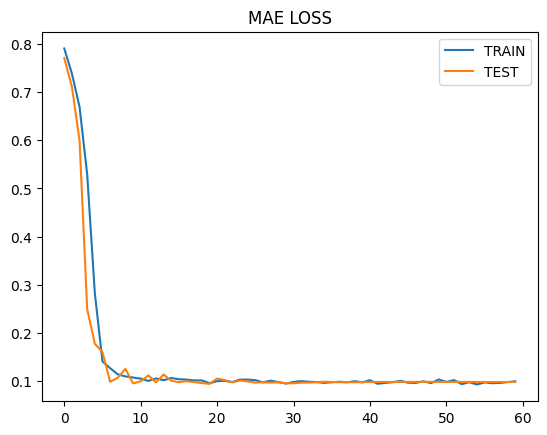

In [143]:
plt.plot(history7.history["loss"])
plt.plot(history7.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [144]:
test_set7 = df_CN['PercentOfBaseline']
test_set7=pd.DataFrame(test_set7)
test_set7.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [145]:
# Getting the predicted PercentOfBaseline
size_test7 = int(len(df_CN['PercentOfBaseline'])) + size_train7
dataset_total7 = pd.concat((training_set7['PercentOfBaseline'], test_set7['PercentOfBaseline']), axis = 0)
inputs7 = dataset_total7[len(dataset_total7) - len(test_set7) - size_train7:].values
inputs7 = inputs7.reshape(-1,1)
inputs7 = sc7.transform(inputs7)
X_test7 = []
for i in range(size_train7, size_test7):
    X_test7.append(inputs7[i-size_train7:i, 0])
X_test7 = np.array(X_test7)
X_test7 = np.reshape(X_test7, (X_test7.shape[0], X_test7.shape[1], 1))
predicted_LSTM_CN = model_CN_LSTM.predict(X_test7)
predicted_LSTM_CN = sc7.inverse_transform(predicted_LSTM_CN)

5/9 [===============>..............] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 16ms/step


In [146]:
predicted_LSTM_CN=pd.DataFrame(predicted_LSTM_CN)
predicted_LSTM_CN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


**Model CANADA ConvLSTM**

In [147]:
training_set8=df_CN['PercentOfBaseline']
training_set8=pd.DataFrame(training_set8)

In [148]:
# Feature Scaling
sc8 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled8 = sc8.fit_transform(training_set8)

In [149]:
# Creating a data structure with 52 timesteps and 1 output
X_train8 = []
y_train8 = []
size_train8 = int(len(df_CN['PercentOfBaseline'])*0.2)
for i in range(size_train8, len(training_set8)):
    X_train8.append(training_set_scaled8[i-size_train8:i, 0])
    y_train8.append(training_set_scaled8[i, 0])
X_train8, y_train8 = np.array(X_train8), np.array(y_train8)

In [150]:
# Reshaping
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_train8, y_train8, test_size = 0.2, shuffle=True, random_state=42)
X_train8 = np.reshape(X_train8, (X_train8.shape[0], X_train8.shape[1], 1))
X_test8 = np.reshape(X_test8, (X_test8.shape[0], X_test8.shape[1], 1))
print(X_train8.shape)

(168, 52, 1)


In [151]:
# Initialising the CNN using LSTM
model_CN_ConvLSTM = Sequential()
model_CN_ConvLSTM.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu', padding='same', input_shape=(X_train8.shape[1],1)))
model_CN_ConvLSTM.add(AveragePooling1D(pool_size=3, strides=1, padding='same'))
model_CN_ConvLSTM.add(Dropout(0.2))
model_CN_ConvLSTM.add(LSTM(64, activation="relu", return_sequences = True))
model_CN_ConvLSTM.add(LSTM(32, activation="relu", return_sequences = False))
model_CN_ConvLSTM.add(Dense(1))
model_CN_ConvLSTM.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 52, 64)            256       
                                                                 
 average_pooling1d_3 (Averag  (None, 52, 64)           0         
 ePooling1D)                                                     
                                                                 
 dropout_7 (Dropout)         (None, 52, 64)            0         
                                                                 
 lstm_14 (LSTM)              (None, 52, 64)            33024     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                      

In [152]:
# Compiling the RNN
# Code here
model_CN_ConvLSTM.compile(optimizer=RMSprop(), loss='mae', metrics=['mse', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

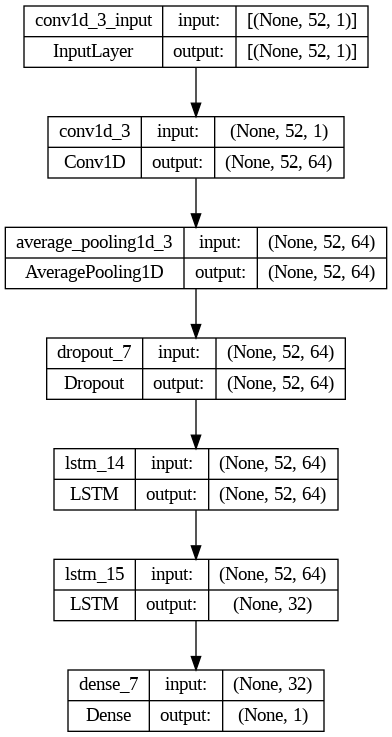

In [153]:
plot_model(model_CN_ConvLSTM, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [154]:
# Fitting the RNN to the Training set
epoch = 60
batch_size = 64
history8 = model_CN_ConvLSTM.fit(X_train8, y_train8, epochs=epoch, batch_size=batch_size, validation_data=(X_test8, y_test8), callbacks=[learning_rate_reduction])

Epoch 1/60
3/3 [==============================] - 6s 523ms/step - loss: 0.7792 - mse: 0.6280 - rmse: 0.7924 - val_loss: 0.6843 - val_mse: 0.4868 - val_rmse: 0.6977 - lr: 0.0010
Epoch 2/60
3/3 [==============================] - 1s 184ms/step - loss: 0.5272 - mse: 0.3179 - rmse: 0.5638 - val_loss: 6.6449 - val_mse: 50.0926 - val_rmse: 7.0776 - lr: 0.0010
Epoch 3/60
3/3 [==============================] - 0s 144ms/step - loss: 2.8880 - mse: 27.1818 - rmse: 5.2136 - val_loss: 0.1822 - val_mse: 0.0414 - val_rmse: 0.2034 - lr: 0.0010
Epoch 4/60
3/3 [==============================] - 0s 130ms/step - loss: 0.1497 - mse: 0.0331 - rmse: 0.1820 - val_loss: 0.1098 - val_mse: 0.0197 - val_rmse: 0.1405 - lr: 0.0010
Epoch 5/60
3/3 [==============================] - 0s 101ms/step - loss: 0.1153 - mse: 0.0276 - rmse: 0.1660 - val_loss: 0.1053 - val_mse: 0.0194 - val_rmse: 0.1392 - lr: 0.0010
Epoch 6/60
3/3 [==============================] - 0s 97ms/step - loss: 0.1127 - mse: 0.0253 - rmse: 0.1590 - val_

In [155]:
yhat8 = model_CN_ConvLSTM.predict(X_test8)

r28 = r2_score(y_test8,yhat8)
mse8 = mean_squared_error(y_test8, yhat8)
mae8 = mean_absolute_error(y_test8,yhat8)
mape8 = mean_absolute_percentage_error(y_test8,yhat8)
rmse8 = np.sqrt(mse8)

print("MAE :" , "%.4f" %mae8)
print("MSE :", "%.4f" %mse8)
print("RMSE :" , "%.4f" %rmse8)
print("MAPE :" , "%.4f" %mape8)
print("R2_score :", "%.4f" %r28)

2/2 [==============================] - 0s 14ms/step
MAE : 0.1027
MSE : 0.0188
RMSE : 0.1372
MAPE : 0.1535
R2_score : -0.0029


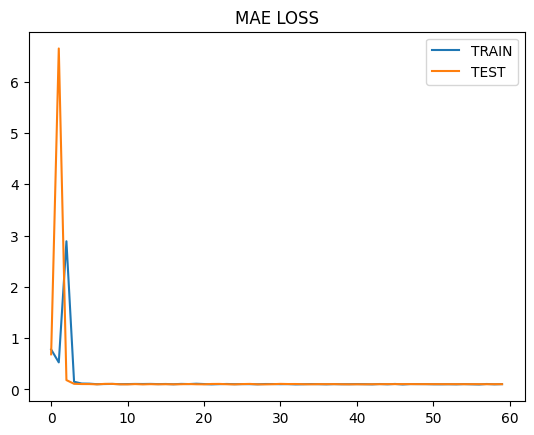

In [156]:
plt.plot(history8.history["loss"])
plt.plot(history8.history["val_loss"])
plt.title("MAE LOSS")
plt.legend(["TRAIN" , "TEST"])
plt.show()

In [157]:
test_set8 = df_CN['PercentOfBaseline']
test_set8=pd.DataFrame(test_set8)
test_set8.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2020-03-16 to 2020-12-02
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PercentOfBaseline  262 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [158]:
# Getting the predicted PercentOfBaseline
size_test8 = int(len(df_CN['PercentOfBaseline'])) + size_train8
dataset_total8 = pd.concat((training_set8['PercentOfBaseline'], test_set8['PercentOfBaseline']), axis = 0)
inputs8 = dataset_total8[len(dataset_total8) - len(test_set8) - size_train8:].values
inputs8 = inputs8.reshape(-1, 1)
inputs8 = sc8.transform(inputs8)
X_test8 = []
for i in range(size_train8, size_test8):
    X_test8.append(inputs8[i-size_train8:i, 0])
X_test8 = np.array(X_test8)
X_test8 = np.reshape(X_test8, (X_test8.shape[0], X_test8.shape[1], 1))
predicted_ConvLSTM_CN = model_CN_ConvLSTM.predict(X_test8)
predicted_ConvLSTM_CN = sc8.inverse_transform(predicted_ConvLSTM_CN)

7/9 [======================>.......] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9/9 [==============================] - 0s 18ms/step


In [159]:
predicted_ConvLSTM_CN = pd.DataFrame(predicted_ConvLSTM_CN)
predicted_ConvLSTM_CN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       262 non-null    float32
dtypes: float32(1)
memory usage: 1.1 KB


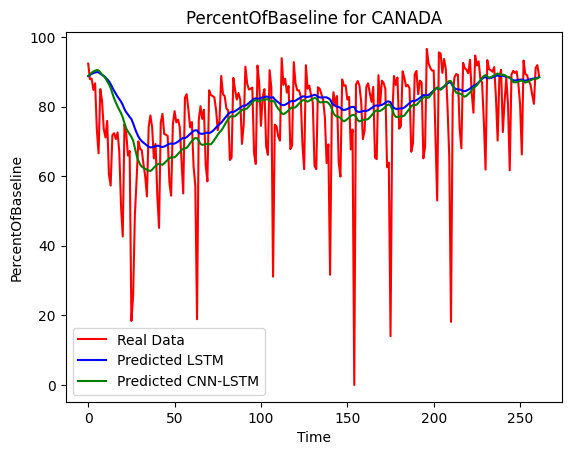

In [160]:
# Visualising the results
plt.plot(df_CN['PercentOfBaseline'].values, color = 'red', label = 'Real Data')
plt.plot(predicted_LSTM_CN, color = 'blue', label = 'Predicted LSTM')
plt.plot(predicted_ConvLSTM_CN, color = 'green', label = 'Predicted CNN-LSTM')
plt.title('PercentOfBaseline for CANADA')
plt.xlabel('Time')
plt.ylabel('PercentOfBaseline')
plt.legend()
plt.show()

In [161]:
MAE_LSTM_CN = mean_absolute_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
MSE_LSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
MAPE_LSTM_CN = mean_absolute_percentage_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
RMSE_LSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN, squared = False)
R2_LSTM_CN = r2_score(df_CN['PercentOfBaseline'].values, predicted_LSTM_CN)
print("MAE LSTM CN:", "%.4f" %MAE_LSTM_CN)
print("MSE LSTM CN:", "%.4f" %MSE_LSTM_CN)
print("MAPE LSTM CN:", "%.4f" %MAPE_LSTM_CN)
print("RMSE LSTM CN:", "%.4f" %RMSE_LSTM_CN)
print("R2 LSTM CN:", "%.4f" %R2_LSTM_CN)

MAE LSTM CN: 9.8347
MSE LSTM CN: 219.9911
MAPE LSTM CN: 1373200320569156.5000
RMSE LSTM CN: 14.8321
R2 LSTM CN: 0.0091


In [162]:
MAE_ConvLSTM_CN = mean_absolute_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
MSE_ConvLSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
MAPE_ConvLSTM_CN = mean_absolute_percentage_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
RMSE_ConvLSTM_CN = mean_squared_error(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN, squared = False)
R2_ConvLSTM_CN = r2_score(df_CN['PercentOfBaseline'].values, predicted_ConvLSTM_CN)
print("MAE ConvLSTM CN:", "%.4f" % MAE_ConvLSTM_CN)
print("MSE ConvSTM CN:", "%.4f" % MSE_ConvLSTM_CN)
print("MAPE ConvLSTM CN:", "%.4f" % MAPE_ConvLSTM_CN)
print("RMSE ConvLSTM CN:", "%.4f" % RMSE_ConvLSTM_CN)
print("R2 ConvLSTM CN:", "%.4f" % R2_ConvLSTM_CN)

MAE ConvLSTM CN: 10.1333
MSE ConvSTM CN: 212.6523
MAPE ConvLSTM CN: 1333958745328069.2500
RMSE ConvLSTM CN: 14.5826
R2 ConvLSTM CN: 0.0422
